In [1]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import shutil
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of Tasks

In [2]:
path = 'Vision_Graph_5/'
dataframe = []
c = 0
print('\n')
for i in os.listdir(path):
    if i in ['.DS_Store', '.ipynb_checkpoints', 'Vision_Graph_2', 'sambitghosh@cccxl009.pok.ibm.com']:
        continue 
    c += 1
    print('Task '+str(c), ' --> ', i)

print('\n')



Task 1  -->  shortest_path
Task 2  -->  neighbor
Task 3  -->  MST
Task 4  -->  predecessor
Task 5  -->  connected_component
Task 6  -->  firstprompt.ipynb
Task 7  -->  DFS
Task 8  -->  connectivity
Task 9  -->  cycle
Task 10  -->  common_neighbor
Task 11  -->  diameter
Task 12  -->  edge
Task 13  -->  jaccard
Task 14  -->  bipartite
Task 15  -->  topological_sort
Task 16  -->  discriprincy.ipynb
Task 17  -->  degree
Task 18  -->  BFS
Task 19  -->  hamiltonian_path
Task 20  -->  clustering_coefficient
Task 21  -->  euler_path
Task 22  -->  page_rank
Task 23  -->  cc5.ipynb
Task 24  -->  maximum_flow




# Number of data point in each tasks

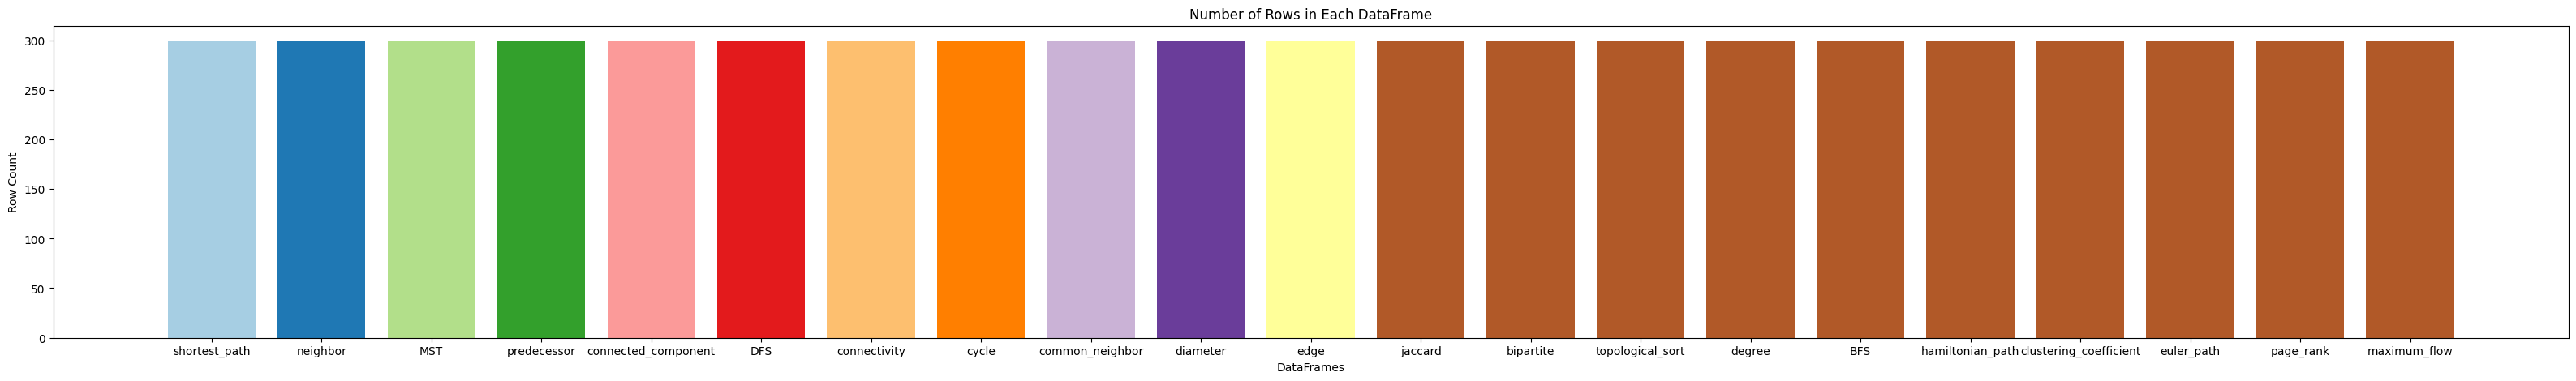

In [4]:
path = 'Vision_Graph_5/'
dataframe = {}
for i in os.listdir(path):
    if i in ['.DS_Store', '.ipynb_checkpoints', 'Vision_Graph_2', 'sambitghosh@cccxl009.pok.ibm.com', 'firstprompt.ipynb', 'discriprincy.ipynb', 'cc5.ipynb']:
        continue 
    temp_path = os.path.join(path, i)
    csv_path = os.path.join(temp_path, i + '.xlsx')
    df = pd.read_excel(csv_path)
    
    dataframe[i] = df

row_counts = {name: df.shape[0] for name, df in dataframe.items()}

colors = plt.cm.Paired(np.arange(len(row_counts)))
plt.figure(figsize=(40, 5))
plt.bar(row_counts.keys(), row_counts.values(), color=colors)
plt.xlabel("DataFrames")
plt.ylabel("Row Count")
plt.title("Number of Rows in Each DataFrame")
plt.show()


# Distribution over node count and edge count

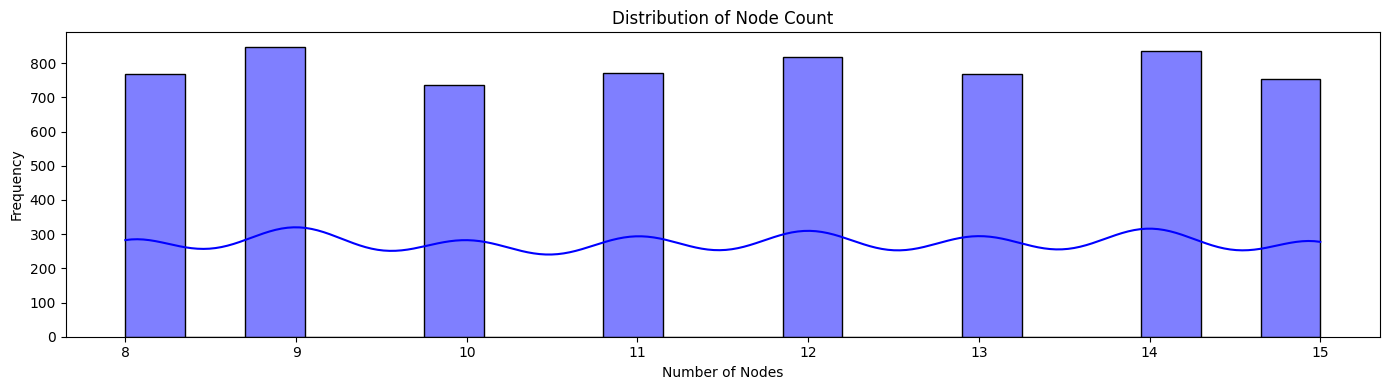

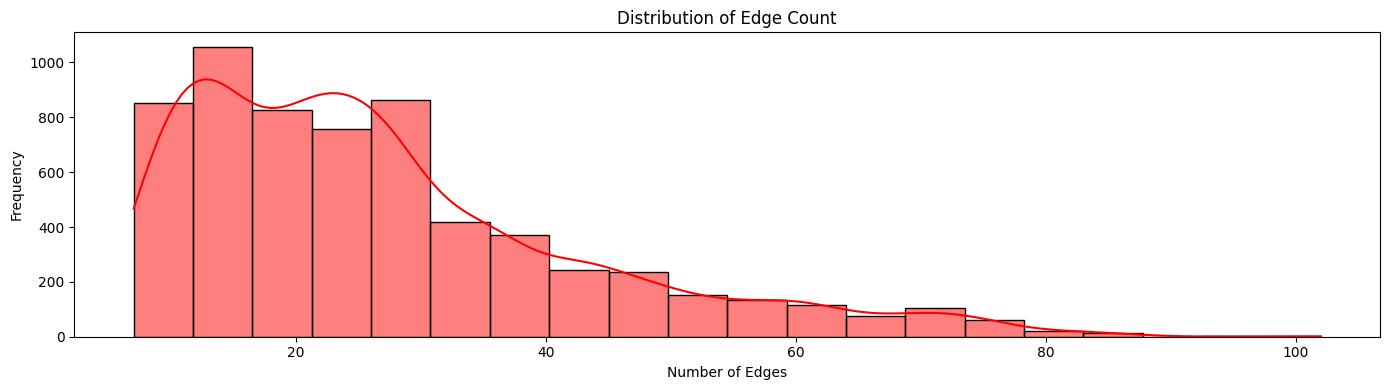

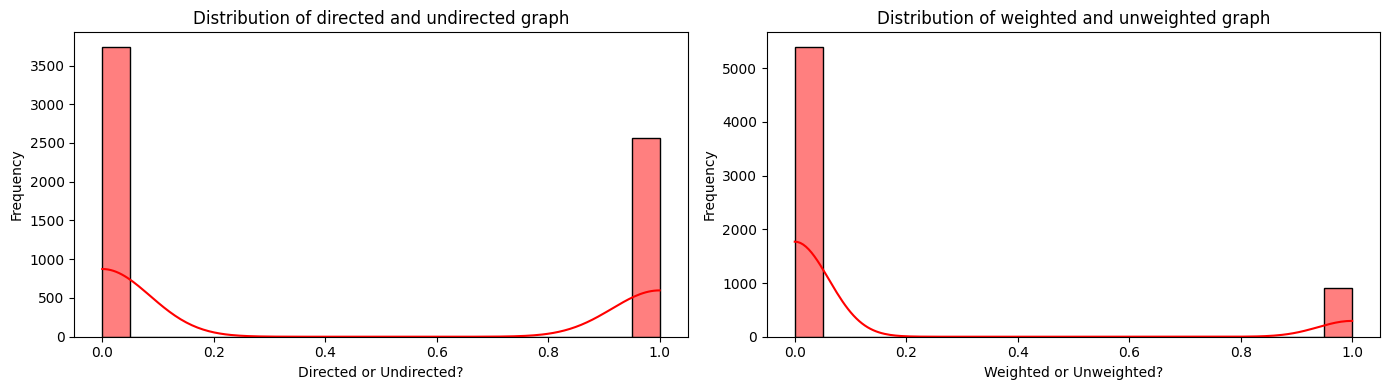

In [5]:
dataframe = []
for i in os.listdir(path):
    if i in ['.DS_Store', '.ipynb_checkpoints', 'Vision_Graph_2', 'sambitghosh@cccxl009.pok.ibm.com', 'firstprompt.ipynb', 'discriprincy.ipynb', 'cc5.ipynb']:
        continue 
    temp_path = os.path.join(path, i)
    csv_path = os.path.join(temp_path, i + '.xlsx')
    df = pd.read_excel(csv_path)
    dataframe.append(df)
    
df = pd.concat(dataframe)
df['weighted'] = df['graph_adj'].apply(lambda x: 'weight:' in x)

print('\n\n')
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Node Count")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(14, 4))
sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax)
ax.set_xlabel("Number of Edges")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Edge Count")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df['directed'], bins=20, kde=True, color='red', ax=ax[0])
ax[0].set_xlabel("Directed or Undirected?")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of directed and undirected graph")

sns.histplot(df['weighted'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Weighted or Unweighted?")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of weighted and unweighted graph")
plt.tight_layout()
plt.savefig("weight_direction.jpg")
plt.show()

In [6]:
test = df[df['choices'].notnull()]

In [7]:
from collections import defaultdict
location_of_choice = defaultdict(list)
length_of_choice = []
for k, (t, i, j) in enumerate(zip(test['task'].values, test['choices'].values, test['answer'].values)):
    x, y = eval(i), str(j).strip()
    x = [str(k).strip() for k in x]
    #print(x, y)
    length_of_choice.append(len(x))
    try:
        index = x.index(y)
    except:
        print(k, x, y)
        continue
    location_of_choice[t].append(index)


#location_of_choice['BFS']

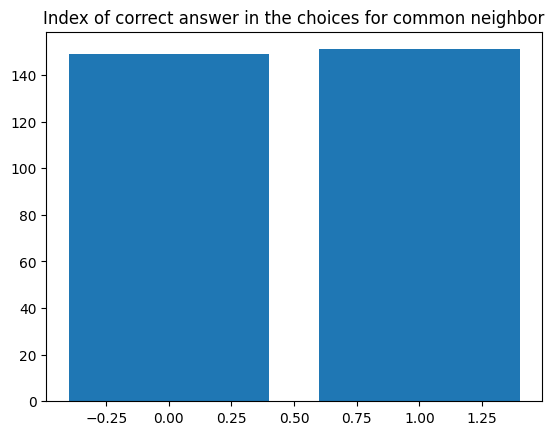

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
c = Counter(location_of_choice['edge'])
plt.bar(c.keys(), c.values())
plt.title("Index of correct answer in the choices for common neighbor")
plt.savefig("index_distribution_common_neighbor.jpg")
plt.show()

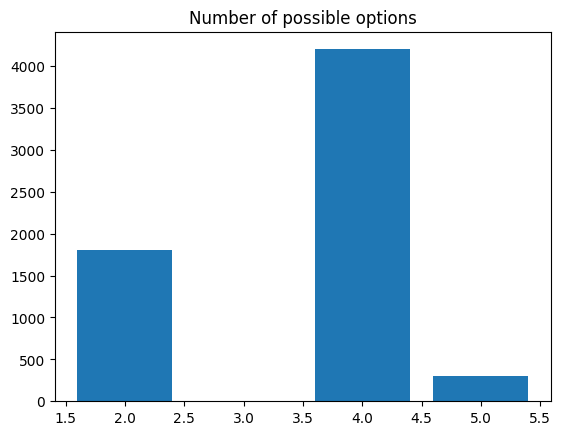

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
c = Counter(length_of_choice)
plt.bar(c.keys(), c.values())
plt.title("Number of possible options")
plt.savefig("option_number_distribution.jpg")
plt.show()

## Task consists of weighted graph

In [10]:
grouped = df.groupby(['weighted', 'directed', 'num_nodes', 'num_edges'])
min_size = grouped.size().min()

# Sample min_size rows from each group
balanced_subset = grouped.sample(n= 1, random_state=42)

df_subset = pd.DataFrame(balanced_subset.reset_index(drop=True))
df_subset.to_excel('Vision_Graph_5_subset.xlsx')
df_subset.shape

(1069, 20)

In [11]:
df[df['weighted'] == True]['task'].unique()

array(['shortest_path', 'MST', 'maximum_flow'], dtype=object)

## Task consists of Un-weighted graph

In [12]:
df[df['weighted'] == False]['task'].unique()

array(['neighbor', 'predecessor', 'connected_component', 'DFS',
       'connectivity', 'cycle', 'common_neighbor', 'diameter', 'edge',
       'Jaccard', 'bipartite', 'topological_sort', 'degree', 'BFS',
       'hamiltonian_path', 'clustering_coefficient', 'euler_path',
       'page_rank'], dtype=object)

## Task consists of directed graph

In [13]:
df[df['directed'] == True]['task'].unique()

array(['shortest_path', 'neighbor', 'predecessor', 'connected_component',
       'DFS', 'connectivity', 'cycle', 'common_neighbor', 'edge',
       'Jaccard', 'topological_sort', 'degree', 'BFS', 'hamiltonian_path',
       'clustering_coefficient', 'euler_path', 'page_rank',
       'maximum_flow'], dtype=object)

## Task consists of Un-directed graph

In [14]:
df[~df['directed'] == False]['task'].unique()

array(['shortest_path', 'neighbor', 'predecessor', 'connected_component',
       'DFS', 'connectivity', 'cycle', 'common_neighbor', 'edge',
       'Jaccard', 'topological_sort', 'degree', 'BFS', 'hamiltonian_path',
       'clustering_coefficient', 'euler_path', 'page_rank',
       'maximum_flow'], dtype=object)

## MCQ Question

In [15]:
df[df['choices'].notnull()]['task'].unique()

array(['shortest_path', 'neighbor', 'MST', 'predecessor',
       'connected_component', 'DFS', 'connectivity', 'cycle',
       'common_neighbor', 'diameter', 'edge', 'Jaccard', 'bipartite',
       'topological_sort', 'degree', 'BFS', 'hamiltonian_path',
       'clustering_coefficient', 'euler_path', 'page_rank',
       'maximum_flow'], dtype=object)

## Descriptive Question

In [16]:
df[~df['choices'].notnull()]['task'].unique()

array([], dtype=object)

## Steps are present

In [17]:
df[df['steps'].notnull()]['task'].unique()

array(['shortest_path', 'neighbor', 'MST', 'predecessor',
       'connected_component', 'DFS', 'connectivity', 'cycle',
       'common_neighbor', 'diameter', 'edge', 'Jaccard', 'bipartite',
       'topological_sort', 'degree', 'BFS', 'clustering_coefficient',
       'page_rank', 'maximum_flow'], dtype=object)

## Steps aren't present

In [18]:
df[~df['steps'].notnull()]['task'].unique()

array(['hamiltonian_path', 'euler_path'], dtype=object)

In [20]:
filtered_df = df[~df['answer'].isin(['yes', 'no', 'Yes', 'No'])]
filtered_df['task'].unique()

array(['shortest_path', 'neighbor', 'MST', 'predecessor',
       'connected_component', 'DFS', 'common_neighbor', 'diameter',
       'Jaccard', 'topological_sort', 'degree', 'BFS',
       'clustering_coefficient', 'page_rank', 'maximum_flow'],
      dtype=object)

# Let's go deep into each taks

## Task 1 --> Breadth First Search

In [ ]:
task = 'BFS'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 1
image_path =  path + '/' + task + '/' + 'images/' +  df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']

img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

In [ ]:
df[df['directed'] == False]

In [ ]:
task = 'BFS'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df1 = pd.read_excel(csv_path)
df1[df1['directed'] == True]
df1['weighted'] = df1['graph_adj'].apply(lambda x: 'weight:' in x)
df1



# task = 'BFS'
# csv_path = path + '/' + task + '/'+ task + '.xlsx'
# df2 = pd.read_excel(csv_path)


## Task 2  -->  Neighbor

In [ ]:
task = 'neighbor'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)
point = 1
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']

img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 3  -->  Minimum spanning tree

In [ ]:
task = 'MST'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']

img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 4  -->  Shortest Path

In [ ]:
task = 'shortest_path'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 5  -->  Predecessor

In [ ]:
task = 'predecessor'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 6  -->  Connected Components

In [ ]:
task = 'connected_component'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
#choices = eval(eval(df.loc[point]['choices'])[0])
temp = '\n'
for k,i in enumerate(choices):
    temp = temp + str(i) + '\n'
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

plt.tight_layout()
plt.show()

## Task 7  -->  Depth First Search

In [ ]:
task = 'DFS'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 8  -->  Cycle

In [ ]:
task = 'cycle'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 9  -->  Common Neighbor

In [ ]:
task = 'common_neighbor'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 10  -->  Diameter

In [ ]:
task = 'diameter'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 11  -->  Edge

In [ ]:
task = 'edge'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 12  -->  Jaccard index

In [ ]:
task = 'jaccard'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 13  -->  Bipartite component

In [ ]:
task = 'bipartite'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
#choices = eval(df.loc[point]['choices'])
temp = '\n'
for k,i in enumerate(choices):
    temp = temp + str(i) + '\n'
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\n", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

plt.tight_layout()
plt.show()

## Task 14  -->  Degree

In [ ]:
task = 'degree'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 15  -->  Hamiltonian Path

In [ ]:
task = 'hamiltonian_path'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
#choices = eval(df.loc[point]['choices'])
temp = '\n'
for k,i in enumerate(choices):
    temp = temp + str(i) + '\n'
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\n", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

plt.tight_layout()
plt.show()

## Task 16  -->  Clustering Co-efficient

In [ ]:
task = 'clustering_coefficient'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 17  -->  Euler Path

In [ ]:
task = 'euler_path'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
#choices = eval(df.loc[point]['choices'])
temp = '\n'
for k,i in enumerate(choices):
    temp = temp + str(i) + '\n'
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\n", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

plt.tight_layout()
plt.show()

## Task 18  -->  Page rank

In [ ]:
task = 'page_rank'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 19  -->  Maximum flow

In [ ]:
task = 'maximum_flow'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Task 20 --> Connectivity

In [ ]:
task = 'connectivity'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()

## Topological Sort

In [ ]:
task = 'topological_sort'
csv_path = path + '/' + task + '/'+ task + '.xlsx'
df = pd.read_excel(csv_path)

point = 3
image_path =  path + '/' + task + '/' + 'images/' + df.loc[point]['image']
question = df.loc[point]['question']
answer = df.loc[point]['answer']
choices = df.loc[point]['choices']
    
img = mpimg.imread(image_path)
fig, ax = plt.subplots(1, 2, figsize=(10, 4))  

ax[0].imshow(img)
ax[0].axis('off') 
ax[1].text(0.6, 0.4, f"Q: {question}\nA: {answer}\n\nChoices: {choices}", fontsize=14, ha='center', va='center', wrap=True)
ax[1].set_xticks([]) 
ax[1].set_yticks([])  
ax[1].set_frame_on(False)  

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(14, 4))

sns.histplot(df['num_nodes'], bins=20, kde=True, color='blue', ax=ax[0])
ax[0].set_xlabel("Number of Nodes")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Distribution of Node Count")

sns.histplot(df['num_edges'], bins=20, kde=True, color='red', ax=ax[1])
ax[1].set_xlabel("Number of Edges")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Distribution of Edge Count")

sns.histplot(df['label'], bins=20, kde=True, color='green', ax=ax[2])
ax[2].set_xlabel("Label of problem")
ax[2].set_ylabel("Frequency")
ax[2].set_title("Distribution of Label Count")

plt.tight_layout()
plt.show()